In [18]:
import numpy as np

def compute_cost(X, y, w, b):
    m = X.shape[0]
    cost = 0
    for i in range(m):
        cost += (np.dot(X[i], w) + b - y[i])**2
    return cost / (2 * m)


def compute_gradient(X, y, w, b):
    m, n = X.shape
    dj_dw = np.zeros(n)
    dj_db = 0

    for i in range(m):
        err = np.dot(X[i], w) + b - y[i]
        for j in range(n):
            dj_dw[j] += err * X[i, j]
        dj_db += err

    dj_dw /= m
    dj_db /= m
    return dj_dw, dj_db


def run_gradient_descent(X, y, num_iters, alpha):
    m, n = X.shape
    w = np.zeros(n)
    b = 0
    history = []

    for i in range(num_iters):
        dj_dw, dj_db = compute_gradient(X, y, w, b)
        w = w - alpha * dj_dw
        b = b - alpha * dj_db
        history.append(compute_cost(X, y, w, b))

    return w, b, history


In [19]:
import numpy as np
import matplotlib.pyplot as plt
def load_house_data():
    X = np.array([
        [2104, 5, 1, 45],
        [1416, 3, 2, 40],
        [1534, 3, 2, 30],
        [852, 2, 1, 36]
    ])
    y = np.array([460, 232, 315, 178])
    return X, y


In [20]:
# load the dataset
X_train, y_train = load_house_data()
X_features = ['size(sqft)','bedrooms','floors','age']


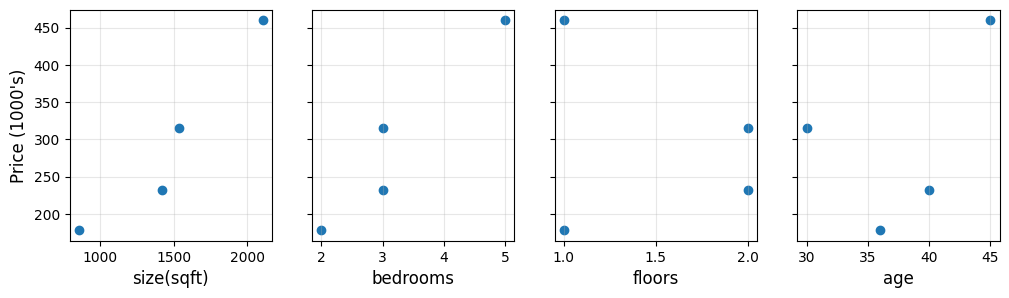

In [21]:
fig,ax=plt.subplots(1, 4, figsize=(12, 3), sharey=True)
for i in range(len(ax)):
    ax[i].scatter(X_train[:,i],y_train)
    ax[i].set_xlabel(X_features[i])
ax[0].set_ylabel("Price (1000's)")
plt.show()

In [22]:
_, _, hist = run_gradient_descent(X_train, y_train, 10, alpha = 9.9e-7)

In [36]:
import matplotlib.pyplot as plt

def plot_cost(hist):
    plt.plot(hist)
    plt.xlabel("Iterations")
    plt.ylabel("Cost")
    plt.title("Cost vs Iterations")
    plt.grid(True)
    plt.show()
def norm_plot(ax, feature):
    ax.hist(feature, bins=10, edgecolor='black')

In [37]:
def plot_cost_i_w(X, y, hist):
    plot_cost(hist)


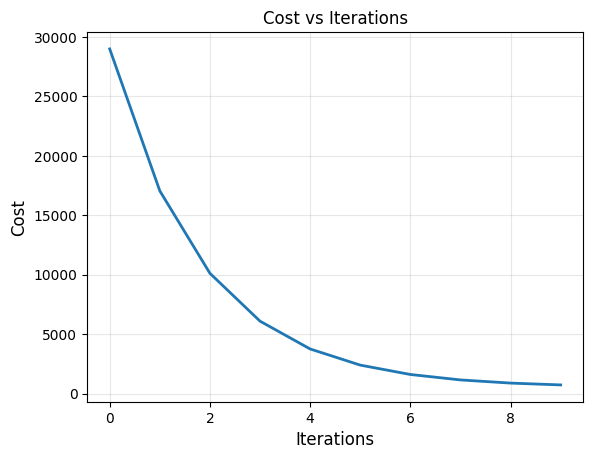

In [38]:
plot_cost_i_w(X_train, y_train, hist)


In [39]:
#set alpha to 9e-7
_,_,hist = run_gradient_descent(X_train, y_train, 10, alpha = 9e-7)


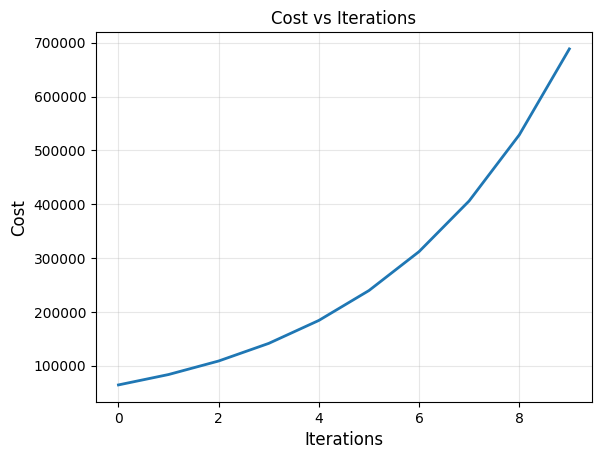

In [40]:
plot_cost_i_w(X_train, y_train, hist)

In [41]:
#set alpha to 1e-7
_,_,hist = run_gradient_descent(X_train, y_train, 10, alpha = 1e-7)

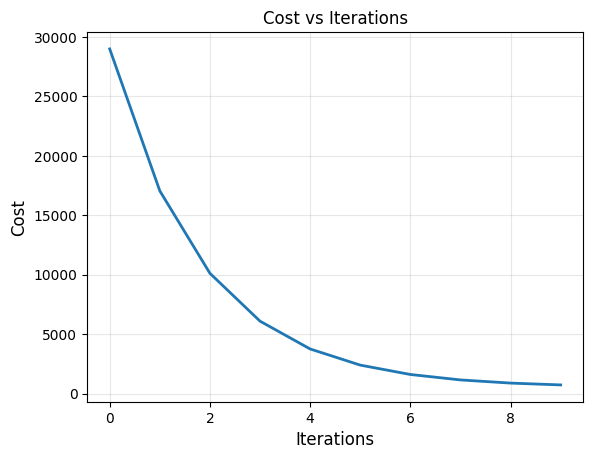

In [42]:
plot_cost_i_w(X_train,y_train,hist)

In [43]:
def zscore_normalize_features(X):
    """
    computes  X, zcore normalized by column
    
    Args:
      X (ndarray (m,n))     : input data, m examples, n features
      
    Returns:
      X_norm (ndarray (m,n)): input normalized by column
      mu (ndarray (n,))     : mean of each feature
      sigma (ndarray (n,))  : standard deviation of each feature
    """
    # find the mean of each column/feature
    mu     = np.mean(X, axis=0)                 # mu will have shape (n,)
    # find the standard deviation of each column/feature
    sigma  = np.std(X, axis=0)                  # sigma will have shape (n,)
    # element-wise, subtract mu for that column from each example, divide by std for that column
    X_norm = (X - mu) / sigma      

    return (X_norm, mu, sigma)
 
#check our work
#from sklearn.preprocessing import scale
#scale(X_orig, axis=0, with_mean=True, with_std=True, copy=True)

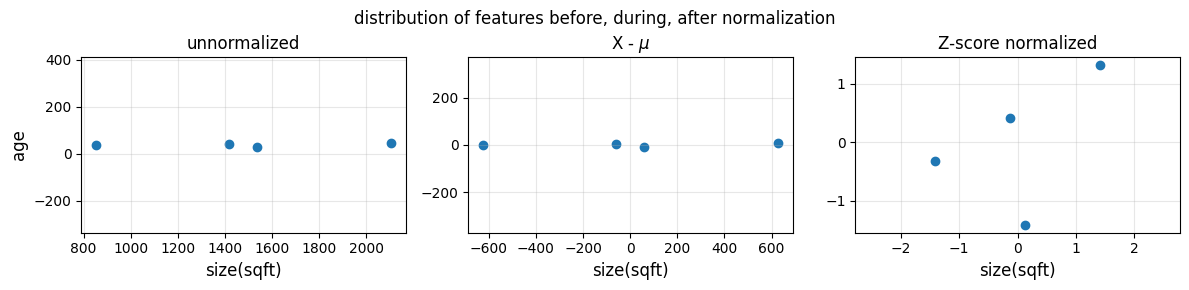

In [44]:
mu     = np.mean(X_train,axis=0)   
sigma  = np.std(X_train,axis=0) 
X_mean = (X_train - mu)
X_norm = (X_train - mu)/sigma      

fig,ax=plt.subplots(1, 3, figsize=(12, 3))
ax[0].scatter(X_train[:,0], X_train[:,3])
ax[0].set_xlabel(X_features[0]); ax[0].set_ylabel(X_features[3]);
ax[0].set_title("unnormalized")
ax[0].axis('equal')

ax[1].scatter(X_mean[:,0], X_mean[:,3])
ax[1].set_xlabel(X_features[0]); ax[0].set_ylabel(X_features[3]);
ax[1].set_title(r"X - $\mu$")
ax[1].axis('equal')

ax[2].scatter(X_norm[:,0], X_norm[:,3])
ax[2].set_xlabel(X_features[0]); ax[0].set_ylabel(X_features[3]);
ax[2].set_title(r"Z-score normalized")
ax[2].axis('equal')
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
fig.suptitle("distribution of features before, during, after normalization")
plt.show()

In [45]:
# normalize the original features
X_norm, X_mu, X_sigma = zscore_normalize_features(X_train)
print(f"X_mu = {X_mu}, \nX_sigma = {X_sigma}")
print(f"Peak to Peak range by column in Raw        X:{np.ptp(X_train,axis=0)}")   
print(f"Peak to Peak range by column in Normalized X:{np.ptp(X_norm,axis=0)}")

X_mu = [1476.5     3.25    1.5    37.75], 
X_sigma = [444.61   1.09   0.5    5.49]
Peak to Peak range by column in Raw        X:[1252    3    1   15]
Peak to Peak range by column in Normalized X:[2.82 2.75 2.   2.73]


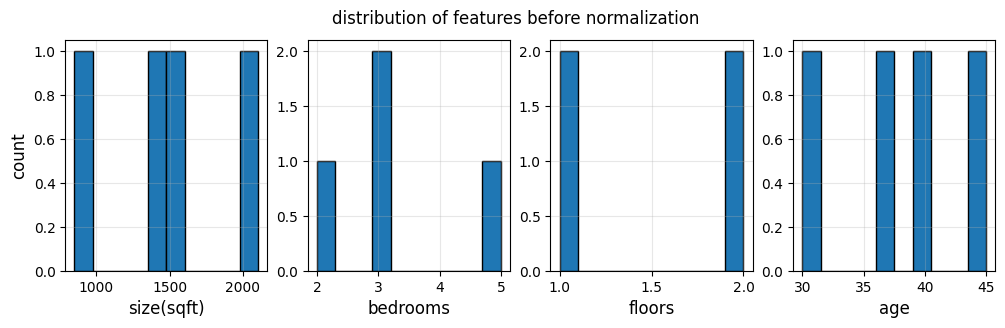

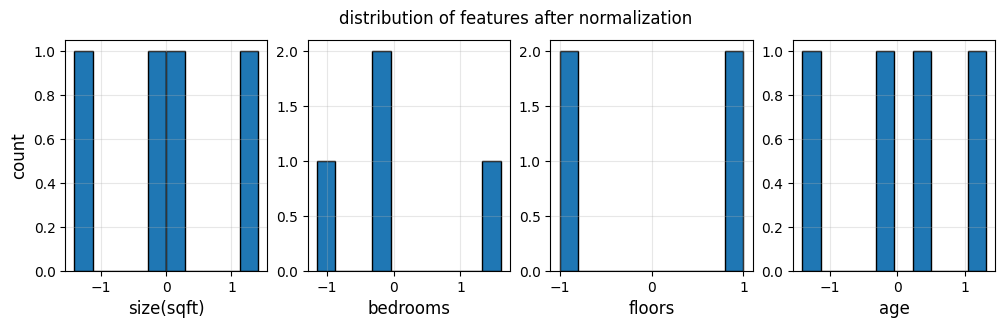

In [46]:
fig,ax=plt.subplots(1, 4, figsize=(12, 3))
for i in range(len(ax)):
    norm_plot(ax[i],X_train[:,i],)
    ax[i].set_xlabel(X_features[i])
ax[0].set_ylabel("count");
fig.suptitle("distribution of features before normalization")
plt.show()
fig,ax=plt.subplots(1,4,figsize=(12,3))
for i in range(len(ax)):
    norm_plot(ax[i],X_norm[:,i],)
    ax[i].set_xlabel(X_features[i])
ax[0].set_ylabel("count"); 
fig.suptitle("distribution of features after normalization")

plt.show()

In [47]:
w_norm, b_norm, hist = run_gradient_descent(X_norm, y_train, 1000, 1.0e-1, )

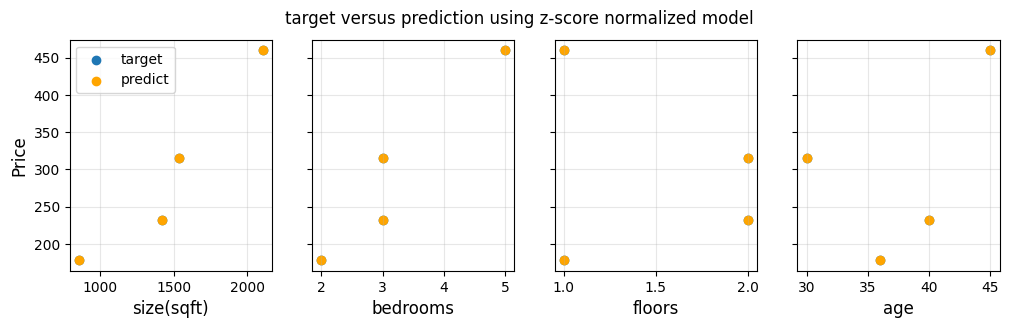

In [49]:
# predict target using normalized features
m = X_norm.shape[0]
yp = np.zeros(m)
for i in range(m):
    yp[i] = np.dot(X_norm[i], w_norm) + b_norm

# plot predictions and targets versus original features    
fig, ax = plt.subplots(1, 4, figsize=(12, 3), sharey=True)

for i in range(len(ax)):
    ax[i].scatter(X_train[:, i], y_train, label='target')
    ax[i].scatter(X_train[:, i], yp, color='orange', label='predict')
    ax[i].set_xlabel(X_features[i])

ax[0].set_ylabel("Price")
ax[0].legend()
fig.suptitle("target versus prediction using z-score normalized model")
plt.show()


In [50]:
# First, normalize out example.
x_house = np.array([1200, 3, 1, 40])
x_house_norm = (x_house - X_mu) / X_sigma
print(x_house_norm)
x_house_predict = np.dot(x_house_norm, w_norm) + b_norm
print(f" predicted price of a house with 1200 sqft, 3 bedrooms, 1 floor, 40 years old = ${x_house_predict*1000:0.0f}")

[-0.62 -0.23 -1.    0.41]
 predicted price of a house with 1200 sqft, 3 bedrooms, 1 floor, 40 years old = $255339


In [52]:
import matplotlib.pyplot as plt

def plt_equal_scale(X_raw, X_norm, y):
    fig, ax = plt.subplots(1, 2, figsize=(10, 4), sharey=True)

    ax[0].scatter(X_raw[:, 0], y)
    ax[0].set_title("Raw feature scale")
    ax[0].set_xlabel("Feature value")
    ax[0].set_ylabel("Target")

    ax[1].scatter(X_norm[:, 0], y)
    ax[1].set_title("Normalized feature scale")
    ax[1].set_xlabel("Feature value")

    plt.show()


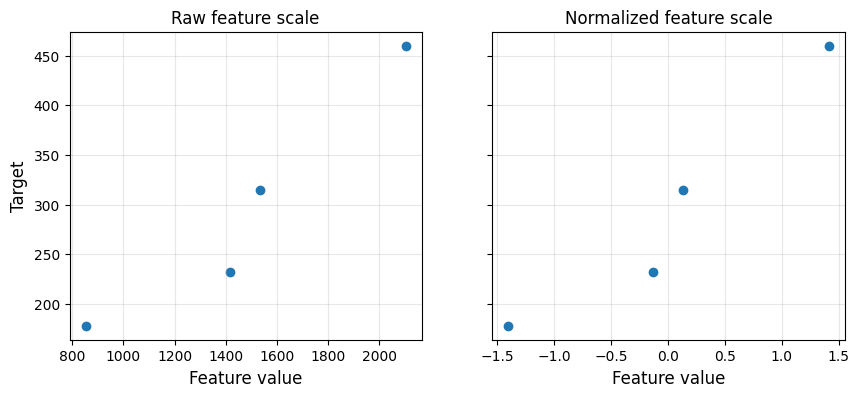

In [53]:
plt_equal_scale(X_train, X_norm, y_train)
